# Causalità dai dati osservazionali {#sec-causality-from-observational-data}

**Prerequisiti**

- Leggere [Statistical Rethinking](https://xcelab.net/rm/statistical-rethinking/). Focalizzati sul capitolo 1 *The Golem of Prague*. 
- Leggere *Causal inference with observational data and unobserved confounding variables* di @byrnes2024causal.
- Leggere *Causal design patterns for data analysts* [@riedererdesignpatterns]. Questo post sul blog fornisce una panoramica di diversi approcci per fare affermazioni causali dai dati osservazionali.
- Leggere [The Effect: An Introduction to Research Design and Causality](https://theeffectbook.net). Focalizzati sul capitolo 10 *Treatment Effects*.
- Leggere *Telling Stories with Data* [@alexander2023telling]. Concentrati sul capitolo 15 *Causality from observational data*.

**Concetti e competenze chiave**

- Non è sempre possibile condurre un esperimento, ma possiamo utilizzare vari approcci per parlare comunque di causalità in una certa misura.
- Dobbiamo anche essere consapevoli dei quattro confondenti di base: la catena, la biforcazione, il collider e il discendente.
- Le inferenze derivanti dai dati osservazionali devono essere utilizzate con attenzione per le debolezze e le assunzioni, sia quelle che possiamo testare sia quelle che non possiamo.

## Introduzione {.unnumbered}

La pura osservazione dei dati può rivelare correlazioni e pattern nei dati, ma senza un'indagine sulle cause che stanno alla base di tali correlazioni, le conclusioni tratte possono essere fuorvianti o incomplete.

Richard McElreath, nel suo libro "Statistical Rethinking" [@McElreath_rethinking], utilizza l'analogia dei Golem - creature potenti ma prive di saggezza - per descrivere un approccio metodologico che è stato a lungo predominante in psicologia. Questo approccio si basa esclusivamente sull'analisi delle associazioni statistiche tra variabili, trascurando considerazioni più profonde sulla causalità.

Il metodo in questione si concentra principalmente sul test delle ipotesi nulle, senza stabilire una chiara connessione tra le domande di ricerca riguardanti relazioni causali e i test statistici impiegati. Questa disconnessione è evidente nella figura successiva, tratta da un manuale di analisi dati di impostazione frequentista, che illustra la procedura raccomandata dai sostenitori di questo approccio per descrivere le associazioni tra variabili. 

![Esempio di albero decisionale per la selezione di una procedura statistica appropriata. Iniziando dall'alto, l'utente risponde a una serie di domande riguardanti la misurazione e l'intento, arrivando infine al nome di una procedura. Sono possibili molti alberi decisionali simili. (Figura tratta da @McElreath_rethinking).](../../figures/mcelreath_golem.png){ width=95% }

È importante notare come tale procedura non fornisca strumenti utili per identificare le effettive cause sottostanti ai fenomeni osservati. Questa limitazione metodologica è stata identificata come uno dei fattori principali che hanno contribuito alla crisi di replicabilità nella ricerca psicologica, come approfondito nel @sec-crisis. L'approccio descritto, pur essendo potente nell'individuare correlazioni, manca della "saggezza" necessaria per distinguere tra semplici associazioni e vere relazioni causali, analogamente ai Golem della metafora di McElreath.

Un problema evidenziato da @McElreath_rethinking è che processi causali completamente distinti possono generare la stessa distribuzione di risultati osservati. Pertanto, un approccio focalizzato esclusivamente sull'analisi delle associazioni mediante il test dell'ipotesi nulla non è in grado di distinguere tra questi diversi scenari, come spiegato nel @sec-causal-inference-regr.

L'approccio frequentista, che si limita a descrivere le associazioni tra le variabili, ha una scarsa capacità di rilevare le caratteristiche cruciali dei fenomeni studiati e tende a produrre un alto tasso di falsi positivi [@van2023new]. È invece necessario utilizzare una metodologia che non si limiti a confutare ipotesi nulle, ma sia in grado di sviluppare modelli causali che rispondano direttamente alle domande di ricerca. In questo capitolo, ci concentreremo sull'introduzione dei concetti fondamentali dell'analisi causale.

## Cos'è la causalità?

@hardt2022patterns introducono il concetto di causalità distinguendo tra osservazione e azione. Ciò che vediamo nell'osservazione passiva è il modo in cui le persone seguono i loro comportamenti abituali, le loro inclinazioni naturali, proiettando lo stato del mondo su un insieme di caratteristiche che abbiamo scelto di evidenziare. Tuttavia, le domande più importanti spesso non riguardano semplici osservazioni.

- Non ci basta sapere che le persone che praticano regolarmente attività fisica soffrono meno d'ansia; vogliamo capire se l'attività fisica riduce effettivamente i livelli d'ansia.
- Non ci accontentiamo di osservare che chi segue una terapia cognitivo-comportamentale (CBT) presenta meno sintomi depressivi; desideriamo verificare se la CBT riduce realmente questi sintomi.
- Non ci limitiamo a constatare che l'uso frequente dei social media è associato a un calo del benessere mentale; vogliamo determinare se l'uso intensivo dei social media causa effettivamente una diminuzione del benessere mentale.

Alla base, il ragionamento causale è un quadro concettuale per affrontare domande sugli effetti di azioni o interventi ipotetici. Una volta compreso quale sia l'effetto di un'azione, possiamo invertire la domanda e chiederci quale azione plausibile abbia causato un determinato evento.

## Effetto Causale

Sebbene non esista una definizione univoca di causalità, possiamo concettualizzarla in modo pratico: diciamo che X causa Y se, intervenendo e modificando il valore di X (il trattamento), la distribuzione di Y cambia di conseguenza. Questa definizione sottolinea l'importanza cruciale dell'azione o dell'intervento nel determinare una relazione causale.

Quando X è una variabile binaria, rappresentante la presenza o l'assenza del trattamento, la conseguenza dell'intervento su X è denominata effetto medio del trattamento. Questo ci indica quanto il trattamento (azione X = 1) aumenta l'aspettativa di Y rispetto all'assenza di trattamento (azione X = 0).

È importante notare che gli effetti causali sono quantità relative alla popolazione. Si riferiscono a effetti mediati sull'intera popolazione in esame. Tuttavia, spesso l'effetto del trattamento può variare significativamente da un individuo all'altro o tra gruppi di individui. In questi casi, parliamo di effetti di trattamento eterogenei.

Per chiarire questo concetto, consideriamo un esempio concreto: supponiamo che la terapia cognitivo-comportamentale (CBT) riduca l'ansia. Se un gruppo di persone ansiose non riceve alcun trattamento, i loro livelli d'ansia rimarranno presumibilmente invariati. Se invece interveniamo introducendo la CBT (modificando così il valore di X), i livelli d'ansia nel gruppo tenderanno a diminuire (cambiando quindi il valore di Y). Questo esempio illustra la distinzione tra semplice correlazione, basata sull'osservazione passiva, e causalità, che implica un'azione o un intervento.

La definizione di causalità può essere applicata anche per collegare variabili apparentemente distanti. Ad esempio, l'autoefficacia potrebbe non avere un effetto causale diretto sulle prestazioni accademiche. Tuttavia, se aumentiamo l'autoefficacia attraverso interventi mirati, è probabile che osserviamo un miglioramento nell'impegno allo studio. Questo aumento dell'impegno, a sua volta, tende a migliorare le prestazioni accademiche. Di conseguenza, possiamo affermare che l'autoefficacia influisce indirettamente sulle prestazioni accademiche attraverso una catena causale.

È importante precisare che affermiamo l'esistenza di una relazione causale tra X e Y anche quando modificare X non porta necessariamente a un cambiamento immediato o deterministico in Y, ma altera la probabilità che Y si verifichi in un certo modo, modificando quindi la distribuzione di Y. Questa prospettiva probabilistica della causalità è particolarmente rilevante in campi come la psicologia, dove le relazioni tra variabili sono spesso complesse e influenzate da molteplici fattori.

### I Limiti dell'Osservazione

Per comprendere i limiti dell'osservazione passiva, e quindi la necessità di comprendere le relazioni causali sottostanti, @hardt2022patterns si riferiscono all'esempio storico delle ammissioni ai corsi di laurea dell'Università della California, Berkeley, nel 1973. In quell'anno, 12,763 candidati furono considerati per l'ammissione in uno dei 101 dipartimenti o major interdipartimentali. Di questi, 4,321 erano donne e 8,442 erano uomini. I dati mostrano che circa il 35% delle donne fu ammesso, rispetto al 44% degli uomini. Test di significatività statistica indicano che questa differenza non è attribuibile al caso, suggerendo una disparità nei tassi di ammissione tra i generi.

Una tendenza simile si osserva quando si analizzano le decisioni aggregate di ammissione nei sei maggiori dipartimenti. Il tasso di ammissione complessivo per gli uomini era di circa il 44%, mentre per le donne era solo il 30%, un'altra differenza significativa. Tuttavia, poiché i dipartimenti hanno autonomia nelle loro decisioni di ammissione, è utile esaminare il possibile bias di genere a livello di singolo dipartimento.

**Uomini**

| Dipartimento | Candidati | Ammessi (%) |
|--------------|-----------|-------------|
| A            | 825       | 62          |
| B            | 520       | 60          |
| C            | 325       | 37          |
| D            | 417       | 33          |
| E            | 191       | 28          |
| F            | 373       | 6           |

**Donne**

| Dipartimento | Candidati | Ammessi (%) |
|--------------|-----------|-------------|
| A            | 108       | 82          |
| B            | 25        | 68          |
| C            | 593       | 34          |
| D            | 375       | 35          |
| E            | 393       | 24          |
| F            | 341       | 7           |

Dall'osservazione di questi dati, emerge che quattro dei sei maggiori dipartimenti mostrano un tasso di ammissione più elevato per le donne, mentre due mostrano un tasso più elevato per gli uomini. Tuttavia, questi due dipartimenti non possono giustificare la sostanziale differenza nei tassi di ammissione osservata nei dati aggregati. Questo suggerisce che la tendenza generale di un tasso di ammissione più alto per gli uomini sembra invertita quando i dati sono disaggregati per dipartimento.

Questo fenomeno è noto come paradosso di Simpson, un paradosso statistico in cui una tendenza che appare in sottopopolazioni si inverte o scompare quando i dati vengono aggregati. Nel contesto attuale, il paradosso di Simpson si manifesta nel fatto che, mentre i dati aggregati sembrano indicare una discriminazione di genere contro le donne, l'analisi dei dati disaggregati per dipartimento rivela che in alcuni casi le donne sono favorite in termini di ammissioni.

La domanda fondamentale è se questi dati indicano effettivamente un problema di discriminazione di genere o se, come suggerito dallo studio originale, il bias di genere nelle ammissioni fosse principalmente dovuto al fatto che "le donne sono indirizzate dalla loro socializzazione e istruzione verso campi di studio generalmente più affollati, meno produttivi in termini di completamento dei diplomi, meno finanziati e che spesso offrono prospettive professionali peggiori." In altre parole, il problema risiederebbe in differenze sistemiche e strutturali tra i campi di studio scelti dalle donne e quelli scelti dagli uomini.

Il paradosso di Simpson crea disagio proprio perché l'intuizione suggerisce che una tendenza valida per tutte le sottopopolazioni dovrebbe esserlo anche a livello aggregato. Tuttavia, questo paradosso evidenzia un errore comune nell'interpretazione delle probabilità condizionate: confondere l'osservazione passiva con l'analisi causale. I dati che abbiamo rappresentano solo un'istantanea del comportamento normale di uomini e donne che si candidavano per l'ammissione a UC Berkeley nel 1973.

Non possiamo trarre conclusioni definitive da questi dati. Possiamo solo riconoscere che l'analisi iniziale solleva ulteriori domande, come ad esempio la necessità di progettare nuovi studi per raccogliere dati più completi, che potrebbero portare a conclusioni più definitive. In alternativa, potremmo discutere su quale scenario sia più verosimile in base alle nostre convinzioni e alle notre ipotesi sul mondo.

L'inferenza causale può essere utile in entrambi i casi. Da un lato, può guidare la progettazione di nuovi studi, aiutandoci a scegliere quali variabili includere, quali escludere e quali mantenere costanti. Dall'altro, i modelli causali possono fungere da meccanismo per incorporare le conoscenze scientifiche del dominio e passare da ipotesi plausibili a conclusioni plausibili.

## Variabili confondenti

Sebbene gli esperimenti controllati offrano un elevato grado di certezza nell'identificazione di queste relazioni, molte domande di ricerca non possono essere affrontate sperimentalmente a causa di limitazioni etiche o pratiche. In questi casi, i ricercatori ricorrono a disegni osservazionali, che offrono maggiore flessibilità e applicabilità. Tuttavia, l'uso di dati osservazionali comporta una sfida significativa: la difficoltà di trarre conclusioni causali affidabili.

Al centro di questa complessità si trovano le variabili confondenti. Possiamo dire che una variabile confondente è presente quando l'associazione osservata tra due variabili X e Y non riflette accuratamente la vera relazione causale tra di esse. In altre parole, la variabile confondente influenza sia X che Y, creando l'apparenza di una relazione diretta tra le due che potrebbe essere fuorviante o inesatta.

Negli studi osservazionali, se le variabili confondenti non vengono misurate e controllate adeguatamente, possono distorcere le stime degli effetti causali, introducendo bias nei risultati e impedendo di riflettere il vero valore dell'effetto. In pratica, la presenza di variabili confondenti può portare a conclusioni errate quando si confrontano semplicemente i risultati osservati in diversi gruppi. Ciò che si osserva nei dati potrebbe non corrispondere a ciò che accadrebbe se si potesse manipolare direttamente la variabile di interesse in un esperimento controllato.

Un approccio apparentemente semplice per affrontare questo problema potrebbe essere quello di controllare statisticamente tutte le variabili confondenti. In questo metodo, si stima l'effetto di X su Y separatamente in ogni segmento della popolazione definito da una condizione Z = z per ogni possibile valore di z. Successivamente, si calcola la media di questi effetti stimati nelle sottopopolazioni, ponderandoli per la probabilità di Z = z nella popolazione. Tuttavia, questo metodo presenta due difficoltà fondamentali: richiede la conoscenza di tutte le possibili variabili confondenti e la capacità di misurare ciascuna di esse, cosa che spesso non è praticabile.

Il controllo delle variabili confondenti è cruciale per stabilire relazioni causali, poiché permette di isolare gli effetti delle variabili indipendenti da quelli delle variabili confondenti che potrebbero influenzare le variabili dipendenti. Esistono due principali metodologie di controllo:

1. Il controllo sperimentale, implementato attraverso il disegno sperimentale e basato principalmente sulla randomizzazione.
2. Il controllo statistico, applicato durante l'analisi dei dati, con l'obiettivo di neutralizzare o quantificare l'influenza delle variabili estranee.

A causa di queste difficoltà, l'inferenza causale basata su dati osservazionali è spesso considerata problematica, dando origine al famoso detto "la correlazione non implica causalità". Tuttavia, è importante notare che in alcune circostanze, è possibile fare inferenze causali anche a partire da dati osservazionali.

L'obiettivo dell'analisi causale moderna è proprio quello di fornire gli strumenti concettuali e metodologici per affrontare queste sfide. Attraverso l'uso di tecniche avanzate come i modelli causali strutturali, i grafi aciclici diretti (DAG) e i metodi di identificazione degli effetti causali, i ricercatori possono spesso superare le limitazioni dei dati osservazionali e trarre conclusioni causali più robuste.

## Modelli Causali Strutturali

I modelli causali sono strumenti essenziali per l'analisi dei dati osservazionali, poiché consentono di rappresentare il processo sottostante a un fenomeno e di prevedere gli effetti di un intervento. Questi modelli non solo permettono di anticipare le conseguenze di una causa, ma offrono anche la possibilità di esplorare scenari controfattuali, immaginando esiti alternativi che si sarebbero potuti verificare in presenza di decisioni diverse.

Un modello causale strutturale (*Structural Causal Model*, SCM) è un approccio che rappresenta le relazioni causali tra variabili. Esso si basa su una serie di assegnazioni che, partendo da variabili di rumore indipendenti (note anche come variabili esogene), generano una distribuzione di probabilità congiunta.

Le variabili di rumore indipendenti svolgono un ruolo cruciale negli SCM. Esse rappresentano fonti di incertezza o variabilità all'interno del sistema e non sono influenzate da altre variabili del modello. Queste variabili sono mutuamente indipendenti, il che significa che il loro valore non fornisce informazioni sul valore delle altre.

La costruzione di un SCM segue una sequenza specifica: si parte dalle variabili di rumore indipendenti, si applicano una serie di assegnazioni che descrivono gli effetti causali delle variabili esogene su altre variabili, e si genera progressivamente un insieme di variabili casuali che dà origine a una distribuzione congiunta.

Il principale vantaggio di un SCM risiede nella sua duplice natura: da un lato, fornisce una distribuzione di probabilità congiunta delle variabili, e dall'altro, descrive il processo generativo che porta alla formazione di tale distribuzione, partendo dalle variabili di rumore elementari.

Questa struttura consente non solo di modellare le relazioni probabilistiche tra le variabili, ma anche di rappresentare in modo esplicito i meccanismi causali che le governano.

I SCM possono essere rappresentati graficamente attraverso Grafi Aciclici Direzionati (*Directed Acyclic Graphs*, DAG). Questi DAG visualizzano le relazioni causali tra le variabili all'interno di un SCM, facilitando l'identificazione delle variabili confondenti e il loro impatto sull'analisi.

## Bias da Variabile Omessa

Possiamo introdurre i DAG facendo riferiento al *bias da variabile omessa* (*Omitted Variable Bias*, o OVB; @wilms2021omitted). Come discusso da @byrnes2024causal, l'omissione dall'analisi statistica di variabili confondenti note ma non misurate, o sconosciute e non misurate, può portare a stime errate della magnitudine degli effetti, errori nel segno delle stime (stimatori distorti), correlazioni spurie, e al mascheramento delle vere relazioni causali.

Un illustrazione di questa situazione è fornita nella @fig-byrnes-dee-1. La figura mostra tre DAG che illustrano diversi scenari in cui le variabili non osservate non influenzano i risultati del modello o potrebbero creare problemi a causa della confusione. Una variabile di risposta di interesse (Y) è causata sia da una variabile misurata (X) che da una variabile non misurata (U). Nel pannello di sinistra, la variabile non osservata (U) non è una variabile confondente. Nel pannello centrale, la variabile non osservata (U) è una variabile confondente e causa il bias da variabile omessa. Nel pannello di destra la variabile non osservata (U) causa il bias da variabile omessa in maniera indiretta.

::: {#fig-byrnes-dee-1}
![](../../figures/byrnes_dee_fig1.png){width="80%"}

Nel pannello di sinistra, X e U sono non correlate, quindi la mancata inclusione di U in un modello statistico aumenterebbe l'errore standard della stima (riducendo la precisione del modello) ma non porterebbe a bias nella stima dell'effetto di X su Y. Tuttavia, se U influenza anche X come nel pannello centrale, o se U e X sono influenzati da un fattore comune Z come nel pannello di destra, allora omettere U da un modello statistico causa il bias da variabile omessa nella stima dell'effetto di X su Y. I casi illustrati dal pannello centrale e dal pannello di destra sono esempi di sistemi in cui le cause comuni di confusione (U e Z rispettivamente) devono essere controllate per effettuare inferenze causali non distorte (la figura è ispirata da @byrnes2024causal).
:::

Affrontare i problemi creati dalle variabili confondenti non misurate rappresenta una sfida primaria nell'inferenza causale dai dati osservazionali. A differenza dell'errore di misurazione nelle variabili predittive, che produce un bias costante verso lo zero e può essere corretto o modellato [@McElreath_rethinking; @schennach2016recent], con l'OVB non possiamo conoscere la grandezza o la direzione del bias senza conoscere tutte le possibili variabili confondenti e le loro relazioni nel sistema.

Nonostante queste sfide, non è necessario abbandonare l'uso dei dati osservazionali per l'inferenza causale in psicologia. È invece necessario ricorrere all'adozione delle tecniche dei SCM per potere comunque svolgere l'inferenza causale. 

È evidente che questo approccio porterà a conclusioni inevitabilmente parziali, destinate ad essere perfezionate da studi successivi. Tuttavia, tale metodologia offre il vantaggio di esplicitare il "modello generativo dei dati", ovvero la struttura causale sottostante ai fenomeni psicologici oggetto di studio.

I progressi nella ricerca empirica conducono a una maggiore comprensione e, di conseguenza, a modifiche nelle ipotesi sui meccanismi causali. Questo processo rappresenta un'evoluzione della conoscenza scientifica. Tale sviluppo è reso possibile proprio perché le ipotesi causali sono formulate in termini di modelli formali, che descrivono in modo preciso i meccanismi ipotizzati.

Al contrario, limitarsi alla mera descrizione delle associazioni tra variabili non consente questo tipo di avanzamento conoscitivo. La formulazione di modelli causali espliciti permette infatti di testare, raffinare e, se necessario, rivedere le ipotesi sui meccanismi sottostanti ai fenomeni osservati, portando a una comprensione più profonda e dinamica dei processi psicologici.

## Grafi Aciclici Diretti

I DAG sono uno strumento fondamentale per l'inferenza causale, offrendo una rappresentazione visiva delle relazioni causali ipotizzate tra variabili. Questi grafi sono definiti "diretti" perché le variabili, rappresentate da nodi, sono collegate da frecce orientate anziché da semplici linee. Sono inoltre chiamati "aciclici" poiché non è possibile tornare a un nodo di partenza seguendo il percorso delle frecce.

In un DAG, una freccia che va da X a Y indica un'influenza probabilistica di X su Y. La terminologia delle relazioni all'interno del grafo è importante: il nodo di origine di una freccia è chiamato "genitore", mentre il nodo di destinazione è detto "figlio". Quando è possibile raggiungere un nodo B partendo da un nodo A seguendo una successione di frecce, A è definito "antenato" di B, e B è considerato "discendente" di A.

I DAG consentono di distinguere chiaramente tra cause dirette e indirette. Una causa diretta è rappresentata da un nodo genitore, mentre una causa indiretta può essere qualsiasi antenato di un nodo nel grafo causale. Questa struttura permette di differenziare efficacemente causa ed effetto basandosi sulla posizione relativa dei nodi all'interno del grafo, ovvero se un nodo è antenato o discendente di un altro.

Questi grafi sono particolarmente utili per identificare variabili confondenti, basandosi sulla teoria sviluppata da Judea Pearl [@pearl2009causality]. È cruciale rappresentare in un DAG tutte le possibili relazioni causali, poiché l'assenza di una freccia tra due nodi implica la certezza dell'assenza di una relazione causale diretta tra le variabili corrispondenti.

Nella teoria dei DAG, due concetti fondamentali sono la d-separazione e il criterio del back-door. 

### La d-separazione {.unnumbered}

La *d-separazione* ci aiuta a determinare quando due variabili in un grafo causale sono indipendenti condizionatamente a un insieme di altre variabili. Questo concetto è cruciale per comprendere come l'informazione o l'influenza si propaga tra le variabili in un modello causale.

In termini più semplici, la d-separazione ci permette di identificare se esiste un "blocco" nel flusso di informazioni tra due variabili, dato un certo insieme di altre variabili (che chiameremo Λ). Quando due variabili sono d-separate da Λ, significa che non c'è flusso di informazioni tra di loro, condizionatamente a Λ.

Per comprendere meglio la d-separazione, consideriamo tre situazioni principali che possono verificarsi in un DAG:

1. Catena (X → Z → Y):
   In questo caso, Z è un mediatore tra X e Y. Se Z appartiene all'insieme Λ (cioè, se controlliamo o condizioniamo su Z), blocchiamo il flusso di informazioni da X a Y attraverso questo percorso. Per esempio, se X è "esercizio fisico", Z è "pressione sanguigna" e Y è "rischio di malattie cardiache", controllando per la pressione sanguigna (Z) blocchiamo il percorso attraverso il quale l'esercizio fisico influenza il rischio di malattie cardiache.

2. Fork (X ← Z → Y):
   Qui, Z è una causa comune sia di X che di Y. Se Z appartiene a Λ, blocchiamo la correlazione spuria tra X e Y che deriva dalla loro causa comune. Per esempio, se Z è "status socioeconomico", X è "livello di istruzione" e Y è "stato di salute", controllando per lo status socioeconomico (Z) eliminiamo la correlazione apparente tra istruzione e salute che potrebbe derivare dal fatto che entrambe sono influenzate dallo status socioeconomico.

3. Collider (X → Z ← Y):
   In questa situazione, Z è un effetto comune di X e Y. Sorprendentemente, se né Z né i suoi discendenti appartengono a Λ, il percorso è già bloccato. Controllare per Z (o i suoi discendenti) in realtà aprirebbe un percorso tra X e Y, creando una correlazione spuria. Per esempio, se X è "intelligenza", Y è "bellezza" e Z è "successo in una carriera di attore", controllare per il successo nella carriera di attore (Z) creerebbe una correlazione apparente tra intelligenza e bellezza, anche se queste potrebbero essere indipendenti nella popolazione generale.

In sintesi, la d-separazione ci permette di determinare, dato un certo insieme di variabili Λ, se due variabili X e Y sono indipendenti condizionatamente a Λ. Questo ci aiuta a identificare quali variabili dobbiamo controllare (e quali non dobbiamo controllare) per ottenere stime causali non distorte, facilitando così l'inferenza causale corretta. La d-separazione è quindi uno strumento potente che ci permette di leggere le indipendenze condizionali direttamente dal grafo, senza dover fare calcoli probabilistici complessi. 

### Il criterio del back-door {.unnumbered}

Il criterio del back-door consente di identificare un insieme di variabili che, se controllate adeguatamente, permettono di stimare gli effetti causali in modo non distorto. L'obiettivo principale di questo criterio è eliminare l'influenza di percorsi non causali tra la variabile di esposizione (causa potenziale) e l'outcome (effetto), mantenendo aperto solo il percorso causale diretto di interesse.

In questo contesto, due variabili sono considerate "confuse" se esiste tra di esse un percorso di tipo back-door. Un back-door path da X a Y è definito come qualsiasi percorso che inizia da X con una freccia entrante in X. Per esempio, consideriamo il seguente percorso:

X ← A → B ← C → Y

In questo caso, il percorso rappresenta un flusso di informazioni da X a Y che non è causale, ma potrebbe creare l'apparenza di una relazione causale.

Per "deconfondere" una coppia di variabili, è necessario selezionare un insieme di variabili (chiamato back-door set) che "blocchi" tutti i back-door paths tra i due nodi di interesse. Il blocco di questi percorsi avviene in modi diversi a seconda della struttura del percorso:

1. Un back-door path che coinvolge una catena di variabili (ad esempio, A → B → C) può essere bloccato controllando per la variabile intermedia (in questo caso, B).

2. Un percorso che coinvolge un "collider" (una variabile che riceve frecce da entrambe le direzioni, come in A → B ← C) è naturalmente bloccato e non permette il flusso di informazioni.

È importante notare che bisogna prestare attenzione a non aprire involontariamente un flusso di informazioni attraverso un collider. Questo può accadere se si condiziona l'analisi sul collider stesso o su un suo discendente, il che potrebbe erroneamente aprire il percorso e introdurre bias nell'analisi.

#### Punti chiave: {.unnumbered}

- Il criterio del back-door aiuta a identificare il set minimale di variabili da controllare.
- Non tutte le variabili associate sia all'esposizione che all'outcome devono essere controllate; solo quelle che creano percorsi back-door.
- In alcuni casi, potrebbe non essere necessario controllare alcuna variabile (se non ci sono percorsi back-door aperti).
- In altri casi, potrebbe essere impossibile bloccare tutti i percorsi back-door con le variabili disponibili, indicando che l'effetto causale non può essere identificato con i dati a disposizione.

Utilizzando il criterio del back-door in combinazione con i DAG, i ricercatori possono fare scelte più informate su quali variabili includere nelle loro analisi, migliorando così la validità delle loro inferenze causali.

### Applicazioni

Consideriamo nuovamente la struttura causale illustrata nella @fig-byrnes-dee-1, pannello centrale. 
Dopo aver costruito un DAG come descritto nella sezione precedente, è possibile identificare le potenziali fonti di bias da variabili omesse, inclusi i confondenti non misurati (ad esempio, U). Non controllare per le variabili confondenti apre una “back-door” permettendo alla variazione confondente di influenzare la relazione tra la variabile causale e la variabile di risposta di interesse attraverso un percorso non valutato [@pearl2009causality]. In altre parole, omettere una variabile confondente come U nella @fig-byrnes-dee-1 (pannello centrale) in un'analisi statistica significa che questa viene incorporata nel termine di errore del modello statistico, insieme alle fonti di errore casuali. La @fig-byrnes-dee-2 illustra le conseguenze di un confondente U che ha un effetto positivo su X ma un effetto negativo su Y. Se adattiamo un modello come mostrato nella @fig-byrnes-dee-2 bi, l'effetto stimato di X su Y è positivo quando si controlla per U. Tuttavia, se non si controlla per U, come mostrato nella @fig-byrnes-dee-2 bii, U viene incorporato nel termine di errore, inducendo una correlazione tra l'errore e X, come illustrato nella @fig-byrnes-dee-2 biii, portando a una stima errata. Pertanto, il termine di errore del modello e X risultano correlati, il che viola un'assunzione fondamentale dei modelli lineari (ovvero, il teorema di Gauss-Markov; Abdallah et al., 2015; Antonakis et al., 2010). Questo produce una stima errata, evidenziata in blu.

::: {#fig-byrnes-dee-2}

![](../../figures/byrnes_dee_fig2.png){width="100%"}

**Una visualizzazione del bias da variabile omessa e delle conseguenze per l'inferenza causale.** (A) mostra un DAG di un sistema in cui X ha un effetto positivo su Y, e una variabile confondente U ha un effetto positivo su Y ma un effetto negativo su X. Le variabili non osservate (cioè non misurate) sono rappresentate in ellissi, come la variabile U e il termine di errore e nel pannello B. (B) illustra diverse stime del DAG in (A) utilizzando un'analisi del percorso. Vedi Box 1 per una breve spiegazione delle principali differenze tra DAG e diagrammi dei percorsi. Presumiamo che U non sia misurata. In (Bi), presumiamo di poter misurare e controllare U, rappresentata dalla freccia a doppia testa tra U e X, che rappresenta la correlazione tra le due variabili considerata dal modello. La variabile non misurata e è la fonte residua di variazione che si presume non sia correlata con nessun predittore. La freccia rossa rappresenta il percorso stimato. Al contrario, (Bii) e (Biii) rappresentano la realtà, dove non abbiamo una misurazione di U e non la controlliamo nel modello dei percorsi. Il ricercatore pensa di adattare il modello in (Bii) ma in realtà sta adattando il modello in (Biii), dove il termine di errore non è solo e, ma la somma di e e la variazione dovuta alla variabile omessa U. A causa di ciò, c'è un percorso diretto dal termine di errore del modello a X (e quindi X è endogeno). (C) mostra le relazioni stimate risultanti dai modelli in (Bi) rispetto a (Bii). Le linee rappresentano la relazione stimata tra X e Y dai rispettivi modelli. La linea rossa è la vera relazione causale, stimata da (Bi), mentre la linea blu contiene il bias da variabile omessa, poiché non si tiene conto della variabile confondente U, come stimato dal modello in Bii/Biii (Figura tratta da @byrnes2024causal).
:::

## Commenti e Considerazioni Finali

I diagrammi causali sono uno dei primi strumenti per identificare il bias da variabili omesse [@pearl_1995; @pearl_2016]. I diagrammi causali, sotto forma di DAG, visualizzano la nostra comprensione delle relazioni causali e delle variabili confondenti all'interno di un sistema. In questo modo, i DAG chiariscono in modo trasparente le assunzioni dietro le affermazioni causali derivate dai dati e mostrano le potenziali fonti di bias derivanti da variabili confondenti.

È fondamentale che i DAG includano tutte le cause comuni di un predittore e della risposta di interesse, comprendendo tutte le variabili confondenti misurate e non misurate. Questo significa che l'inferenza causale è possibile solo quando il ricercatore dispone di adeguate conoscenze del dominio.

Dopo aver costruito un DAG, è possibile determinare le potenziali fonti di bias da variabili omesse, incluse quelle derivanti da variabili confondenti non misurate (es., U nella figura fig-byrnes-dee-1, pannello centrale). Non controllare le variabili confondenti apre una “back-door” per la variazione confondente, permettendo a quest'ultima di fluire tra la variabile causale e la variabile di risposta di interesse attraverso un percorso non valutato [@pearl2009causality].

Pertanto, un diagramma causale è un primo passo fondamentale per identificare potenziali bias da variabili omesse. I DAG giustificano anche la scelta delle variabili di controllo, rendendo trasparenti le assunzioni che un ricercatore fa su come funziona il sistema oggetto di studio. 

È importante notare che i DAG possono essere incorretti o non includere variabili confondenti sconosciute. Infatti, un DAG rappresenta solo la comprensione *attuale* e le assunzioni del ricercatore riguardo alle relazioni causali all'interno di un sistema.

Un sommario ironico di questi concetti è fornito nella vignetta di [xkcd](https://www.explainxkcd.com/wiki/index.php/2560:_Confounding_Variables).

## Esercizi 

::: {#exr-causality-1}

Consideriamo il seguente DAG dove A influenza B e D, B influenza C, e D influenza B.

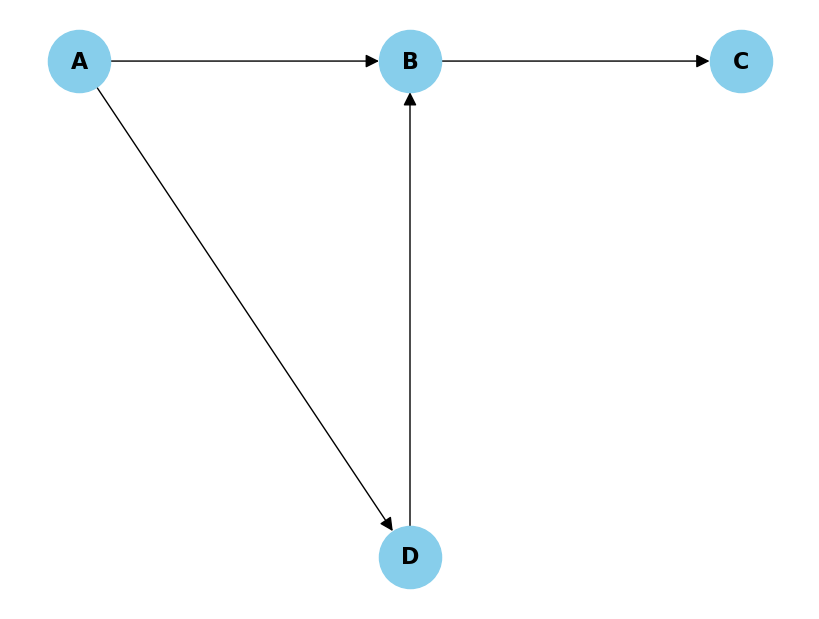

In [2]:
# | echo: false

import matplotlib.pyplot as plt
import networkx as nx

# Creare un grafico diretto (DAG)
G = nx.DiGraph()

# Aggiungere i nodi
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

# Aggiungere gli archi (relazioni)
G.add_edges_from([("A", "B"), ("B", "C"), ("D", "B"), ("A", "D")])

# Posizionare i nodi manualmente
pos = {"A": (0, 1), "B": (2, 1), "C": (4, 1), "D": (2, 0)}

# Disegnare il grafico
# plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    arrowsize=20,
)
plt.show()

Se vogliamo stimare l'effetto causale di A su C, quale delle seguenti affermazioni è corretta riguardo alla d-separazione e al controllo delle variabili?

a) Controllare per B è sufficiente e necessario per ottenere una stima non distorta dell'effetto di A su C.

b) Controllare per D è necessario per bloccare il back-door path tra A e C.

c) Non è necessario controllare per alcuna variabile, poiché non ci sono confondenti tra A e C.

d) Controllare sia per B che per D è necessario per ottenere una stima non distorta dell'effetto di A su C.

e) Controllare per B potrebbe introdurre un bias, poiché B è un collider nel percorso A → B ← D.

:::

::: {#exr-causality-2}

Consideriamo il seguente DAG dove X è la variabile di esposizione, Y è l'outcome, e Z e W sono altre variabili nel sistema.

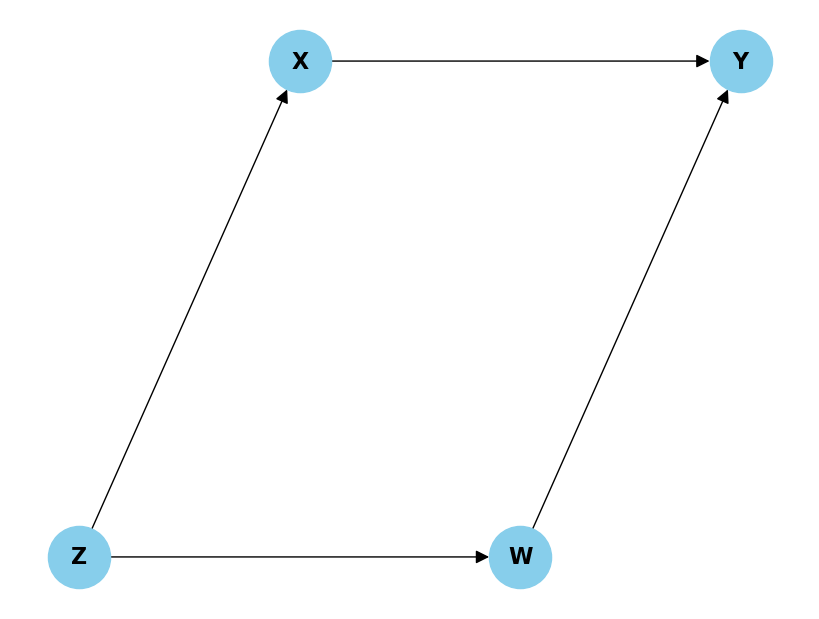

In [3]:
# | echo: false

import matplotlib.pyplot as plt
import networkx as nx

# Creare un grafico diretto (DAG)
G = nx.DiGraph()

# Aggiungere i nodi
G.add_node("X")
G.add_node("Y")
G.add_node("Z")
G.add_node("W")

# Aggiungere gli archi (relazioni)
G.add_edges_from([("X", "Y"), ("Z", "X"), ("Z", "W"), ("W", "Y")])

# Posizionare i nodi manualmente
pos = {"X": (1, 1), "Y": (3, 1), "Z": (0, 0), "W": (2, 0)}

# Disegnare il grafico
# plt.figure(figsize=(4, 3))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    arrowsize=20,
)
plt.show()

Se vogliamo stimare l'effetto causale di X su Y utilizzando il criterio del back-door, quale delle seguenti affermazioni è corretta?

a) Non è necessario controllare per alcuna variabile, poiché non ci sono back-door paths tra X e Y.

b) È necessario controllare solo per Z per bloccare tutti i back-door paths tra X e Y.

c) È necessario controllare solo per W per bloccare tutti i back-door paths tra X e Y.

d) È necessario controllare sia per Z che per W per bloccare tutti i back-door paths tra X e Y.

e) Non è possibile stimare l'effetto causale di X su Y in questo DAG utilizzando il criterio del back-door.

:::

::: {#exr-causality-3}

Consideriamo il seguente DAG dove A e B influenzano C indipendentemente, e C influenza D.

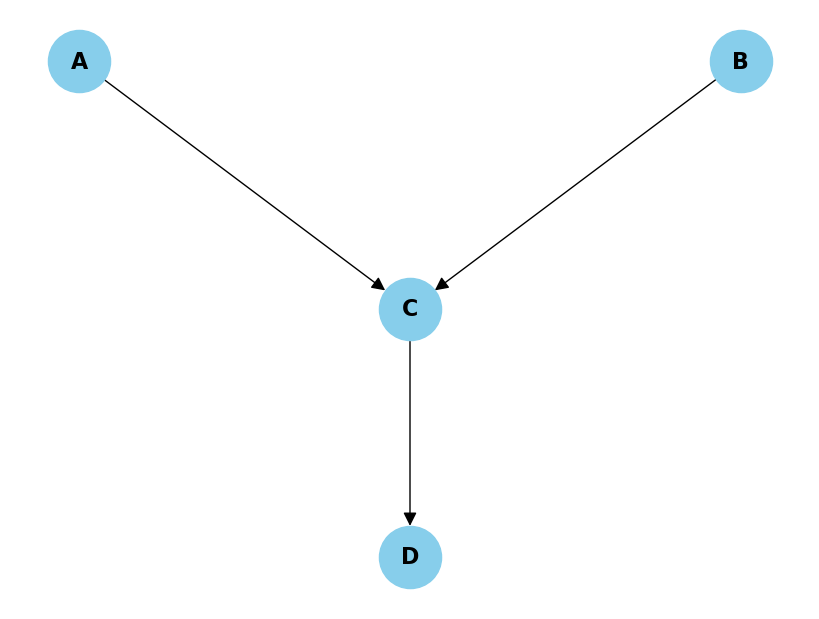

In [4]:
# | echo: false

import matplotlib.pyplot as plt
import networkx as nx

# Creare un grafico diretto (DAG)
G = nx.DiGraph()

# Aggiungere i nodi
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

# Aggiungere gli archi (relazioni)
G.add_edges_from([("A", "C"), ("B", "C"), ("C", "D")])

# Posizionare i nodi manualmente
pos = {"A": (0, 1), "B": (2, 1), "C": (1, 0), "D": (1, -1)}

# Disegnare il grafico
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    arrowsize=20,
)
plt.show()

Supponiamo di voler studiare la relazione tra A e B. Quale delle seguenti affermazioni è corretta riguardo a questo DAG e al concetto di collider?

a) A e B sono indipendenti, ma diventano dipendenti se controlliamo per C.

b) A e B sono dipendenti, ma diventano indipendenti se controlliamo per C.

c) A e B sono sempre dipendenti, indipendentemente dal fatto che controlliamo o meno per C.

d) A e B sono sempre indipendenti, indipendentemente dal fatto che controlliamo o meno per C o D.

e) Controllare per D è necessario per rendere A e B indipendenti.

:::

::: {#exr-causality-4}

Consideriamo il seguente DAG dove X è la variabile di esposizione, Y è l'outcome, U è una variabile non osservata, e Z è una variabile osservata. 

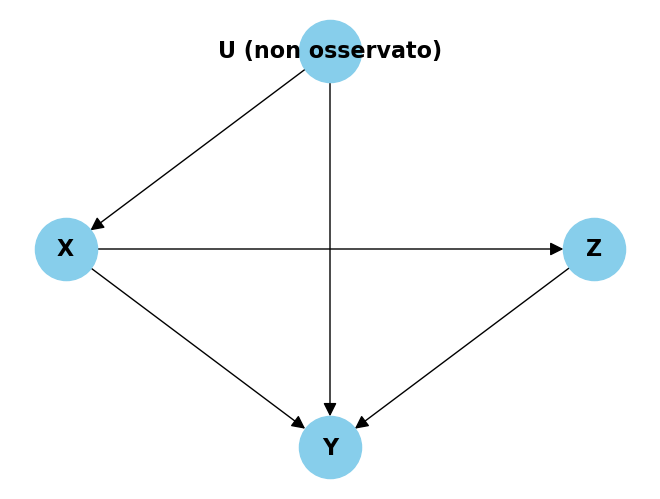

In [7]:
# | echo: false

import matplotlib.pyplot as plt
import networkx as nx

# Creare un grafico diretto (DAG)
G = nx.DiGraph()

# Aggiungere i nodi
G.add_node("U (non osservato)")
G.add_node("X")
G.add_node("Y")
G.add_node("Z")

# Aggiungere gli archi (relazioni)
G.add_edges_from(
    [
        ("U (non osservato)", "X"),
        ("U (non osservato)", "Y"),
        ("X", "Y"),
        ("X", "Z"),
        ("Z", "Y"),
    ]
)

# Posizionare i nodi manualmente
pos = {"U (non osservato)": (1, 2), "X": (0, 1), "Z": (2, 1), "Y": (1, 0)}

# Disegnare il grafico
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2000,
    node_color="skyblue",
    font_size=16,
    font_weight="bold",
    arrowsize=20,
)
plt.show()

Quale delle seguenti affermazioni è corretta riguardo all'applicazione del criterio del back-door per stimare l'effetto causale di X su Y in questo DAG?

a) Non è possibile applicare il criterio del back-door perché U non è osservata.

b) Controllare per Z è sufficiente per bloccare tutti i back-door paths tra X e Y.

c) Controllare per Z non è necessario perché non ci sono back-door paths tra X e Y.

d) È necessario controllare sia per U che per Z per ottenere una stima non distorta dell'effetto causale di X su Y.

e) Controllare per Z potrebbe introdurre un bias nella stima dell'effetto causale di X su Y.

:::

::: {#exr-causality-5}

Considera le relazioni tra le variabili:

- $A \sim \mathcal{N}(0, 1)$.
- $M = A + \epsilon_1$, dove $\epsilon_1 \sim \mathcal{N}(0, 1)$, 
- $B = M + \epsilon_2$, dove $\epsilon_2 \sim \mathcal{N}(0, 1)$. 
  
1. Identifica la struttura causale risultante. 
2. Crea una simulazione in Python con le precedenti relazioni tra variabili (con $n$ = 10,000) e crea un diagramma a dispersione per A e B.
3. Calcola la correlazione tra A e B. 

:::

::: {#exr-causality-6}

Considera le seguenti relazioni tra le variabili:

- $C \sim \mathcal{N}(0, 1)$,
- $A = C + \epsilon_1$, dove $\epsilon_1 \sim \mathcal{N}(0, 1)$,
- $B = C + \epsilon_2$, dove $\epsilon_2 \sim \mathcal{N}(0, 1)$.
  
1. Identifica la struttura causale risultante. 
2. Crea una simulazione in Python con le precedenti relazioni tra variabili (con $n$ = 10,000) e crea un diagramma a dispersione per A e B.
3. Calcola la correlazione tra A e B. 

:::

::: {#exr-causality-7}

Consideriamo la struttura causale del confondimento, in cui una variabile $C$ influenza entrambe le variabili $A$ e $B$:

- $C \sim \mathcal{N}(0, 1)$ (cioè, $C$ è distribuita secondo una normale standard),
- $A = C + \epsilon_1$, dove $\epsilon_1 \sim \mathcal{N}(0, 1)$ (cioè, $A$ è una funzione di $C$ con un termine di errore additivo),
- $B = C + \epsilon_2$, dove $\epsilon_2 \sim \mathcal{N}(0, 1)$ (cioè, $B$ è una funzione di $C$ con un altro termine di errore additivo).

In questa simulazione Python, si genericno 10,000 osservazioni secondo le relazioni sopra descritte. Successivamente, si calcolino i residui della regressione di $A$ su $C$ e di $B$ su $C$. Questi residui rappresentano le componenti di $A$ e $B$ indipendenti linearmente da $C$. Infine, calcoli la correlazione tra i residui di $A$ e $B$, ovvero la correlazione tra $A$ e $B$ dopo aver controllato l'effetto di $C$. Si interpretino i risultati.

:::

::: {#exr-causality-8}

Consideriamo la struttura causale della mediazione, in cui una variabile $A$ influenza una variabile $M$, che a sua volta influenza una variabile $B$:

- $A \sim \mathcal{N}(0, 1)$ (cioè, $A$ è distribuita secondo una normale standard),
- $M = A + \epsilon_1$, dove $\epsilon_1 \sim \mathcal{N}(0, 1)$ (cioè, $M$ è una funzione di $A$ con un termine di errore additivo),
- $B = M + \epsilon_2$, dove $\epsilon_2 \sim \mathcal{N}(0, 1)$ (cioè, $B$ è una funzione di $M$ con un altro termine di errore additivo).

In questa simulazione Python, genera 10.000 osservazioni secondo le relazioni sopra descritte. Successivamente, calcola i residui della regressione di $M$ su $A$ e di $B$ su $M$. Questi residui rappresentano le componenti di $M$ e $B$ indipendenti linearmente da $A$ e $M$, rispettivamente. Infine, calcoleremo la correlazione tra $A$ e i residui di $B$, ovvero la correlazione tra $A$ e $B$ dopo aver controllato per l'effetto della mediazione attraverso $M$. 

:::

::: {#exr-causality-9}

Consideriamo ora la struttura causale di un **collider**, in cui due variabili indipendenti $A$ e $B$ influenzano entrambe una variabile $M$. In questa configurazione, $M$ è il **collider**. Un aspetto fondamentale di questa struttura è che il controllo su $M$ (il collider) può indurre una correlazione spuria tra $A$ e $B$, anche se $A$ e $B$ non sono direttamente correlati.

Le relazioni causali sono le seguenti:

- $A \sim \mathcal{N}(0, 1)$ (cioè, $A$ è distribuita secondo una normale standard),
- $B \sim \mathcal{N}(0, 1)$ (cioè, $B$ è distribuita secondo una normale standard),
- $C = A + B + \epsilon_1$, dove $\epsilon_1 \sim \mathcal{N}(0, 1)$ (cioè, $C$ è una funzione di $A$ e $B$ con un termine di errore additivo).

In questa simulazione Python, genera 10,000 osservazioni secondo le relazioni sopra descritte. Successivamente, calcola i residui della regressione di $C$ su $A$ e $B$. Infine, calcola la correlazione tra $A$ e $B$ dopo aver controllato per $C$.

:::